In [125]:
# Import essential modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error  as mse
import math

In [104]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Read the height_mass.csv into a Pandas DataSet called: people 
people = pd.read_csv("height_mass.csv")
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


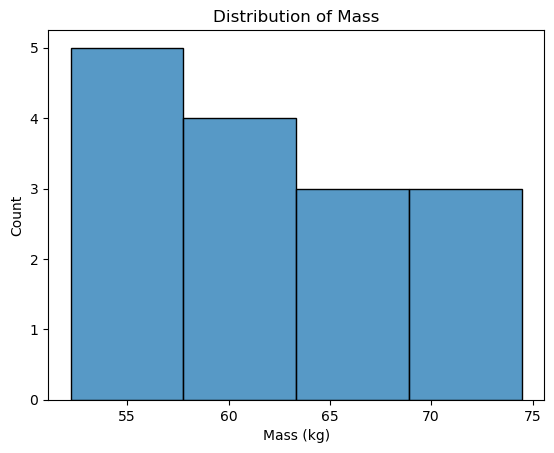

In [128]:
# Use Seaborn histplot to show the distribution for Mass
sb.histplot(people['Mass (kg)'], bins = 4)

# Add title to the plot
plt.title('Distribution of Mass')

# Display the plot 
plt.show()

- When bins = 4, the distribution is the clearest and every bin is almost well distributed. With the smaller bin numbers, it is not as detailed, and with the larger bin numbers, it is too detailed with a lot of repetitions at 1 count.
- According to the plot, most of the mass is range from around 50kg to 57.5kg with 5 counts while the number of people whose masses are between 63kg-68kg and 70kg-74kg is the smallest with 2 counts in each bin. Finally, there are 4 people whose masses are between 57.5kg - 63kg.

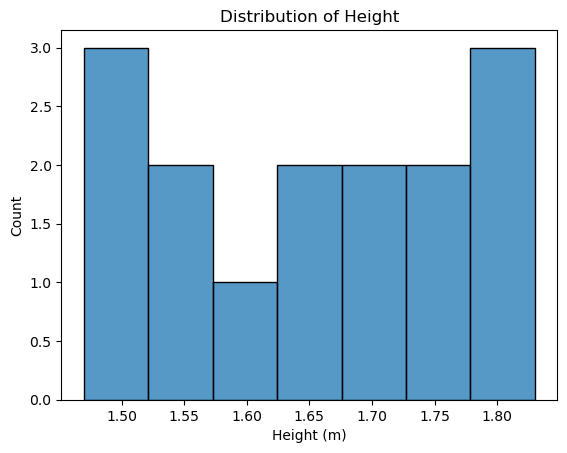

In [127]:
# Use Seaborn histplot to show the distribution for Height
sb.histplot(people['Height (m)'], bins = 7)

# Add title to the plot
plt.title('Distribution of Height')

# Display the plot
plt.show()

- When bins = 7, every bin is well distributed. With smaller numbers of bins, the plot is too general and when bins = 5, all the bars are at the same height. When the bin numbers are higher than 7, the plot looks unnecessarily specific, like when we zoom out on a picture.
- According to the plot, the majority of the heights range around 1.45m - 1.525m and 1.775m - 1.825m with 3 counts in each bin, while the lowest bar is the one from 1.575m - 1.625m with 1 count. The bins of 1.525m - 1.575m, 1.625m - 1.675m, 1.675m - 1.725m and 1.725m - 1.775m have the same numbers of counts in each bin (2 counts). 

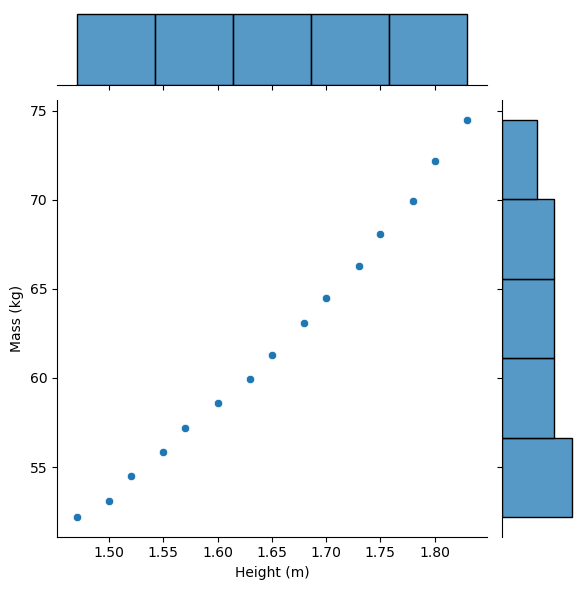

In [108]:
# Use jointplot() to show the plot for height and mass
sb.jointplot(data = people, x = 'Height (m)', y = 'Mass (kg)')

In terms of the bins in the histplots in this plot, it does not agree well with the histplots above. There are 5 bins for the histplots in this jointplot while there are 4 bins in the histplot for Mass and 7 bins in the histplot for Height, and it's difficult to tell the differences in the distribution for each range of height. However, from this jointplot, we can see that the height and mass in this dataset have a positive correlation as the mass increases when the height goes up. 

In [109]:
# Drop the "Mass" column to create the feature matrix (x)
x = people.drop(columns=["Mass (kg)"])

# Specify the "Mass" column as the target variable (y)
y = people["Mass (kg)"]



In [110]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Print the shapes of the resulting datasets
print(f"Training data (x_train): {x_train.shape}")
print(f"Testing data (x_test): {x_test.shape}")
print(f"Training labels (y_train): {y_train.shape}")
print(f"Testing labels (y_test): {y_test.shape}")

Training data (x_train): (12, 1)
Testing data (x_test): (3, 1)
Training labels (y_train): (12,)
Testing labels (y_test): (3,)


In [111]:
# Create a model using sklearn LinearRegression model 
model = LinearRegression()

# Use fit() to fit it to the training data
model.fit(x_train, y_train) 

LinearRegression()

In [112]:
# Use predict() to predict values with the x testing data
y_pred = model.predict(x_test)
y_pred

array([65.14531356, 68.30189952, 50.62501816])

In [113]:
# Calculate Mean Absolute Error (MAE) 
mae = mae(y_test, y_pred)

# Calculate Mean Squared Error
mse = mse(y_test, y_pred) 

# Calculate Root Mean Squared Error (RMSE) 
rmse = math.sqrt(mse) 

# Print out error metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.8207316384180791
Mean Squared Error (MSE): 1.0029930838678223
Root Mean Squared Error (RMSE): 1.0014954237877587


In [118]:
# Use predict() with a 2d array 
# to predict a specific mass from a given height
predicted_mass = model.predict([[1.60]])
print('The predicted mass for the height of 1.60 is:', predicted_mass[0])

The predicted mass for the height of 1.60 is: 58.832141646489106


- The predicted mass for the height of 1.60 is 58.83kg
- The actualy mass for the height of 1.60 is 58.57kg
- The Root Mean Squared Error (RMSE) of the model is 1.0014954237877587

As can be seen, the difference between the two numbers are small at around 0.26kg, which agrees with the RMSE at around 1.0015kg.This means that the average difference between the predictions and the actual values are small.  

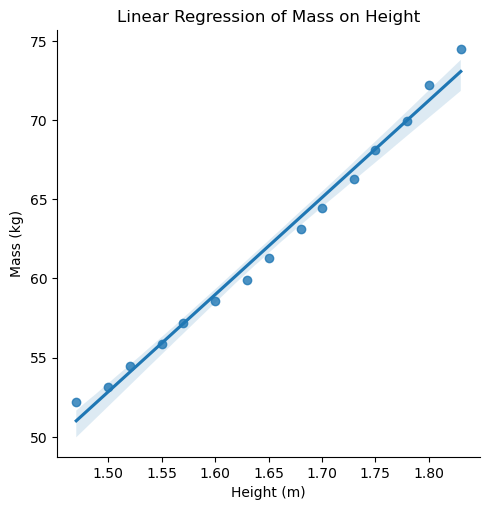

In [126]:
# Use seaborn to display an lmplot with fit_reg=True
sb.lmplot(x="Height (m)", y="Mass (kg)", data=people, fit_reg=True)

# Set plot labels and title
plt.xlabel("Height (m)")
plt.ylabel("Mass (kg)")
plt.title("Linear Regression of Mass on Height")

# Show plot
plt.show()

The lmplot with the linear regression line supports and complements the observations made in task #6 using the jointplot, providing additional clarity and confirmation of the positive correlation between height and mass and also the RMSE of the model. There are several points that line directly on the line or very close to it while the first point and the last two points seem a little bit further from the line compared to other points, therefore, the differences between the actual data and the predictions for these two point